In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('C:/Users/josue/Desktop/WGU/D212/churn_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [2]:
# Rename the 'item' columns to the specified survey response names
column_rename_map = {
    'Item1': 'Responses',
    'Item2': 'Solutions',
    'Item3': 'Replacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectfulness',
    'Item7': 'Courteous',
    'Item8': 'Listening'
}

# Apply the renaming
df.rename(columns=column_rename_map, inplace=True)
# Display the renamed columns
print("Renamed Columns:\n", df.columns)

Renamed Columns:
 Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Responses',
       'Solutions', 'Replacements', 'Reliability', 'Options', 'Respectfulness',
       'Courteous', 'Listening'],
      dtype='object')


In [3]:
# Selecting the continuous variables for PCA
continuous_vars = [
    'Age', 'Income', 'Outage_sec_perweek', 'Tenure',
    'MonthlyCharge', 'Bandwidth_GB_Year'
]

In [4]:
# Extracting the continuous variables data from the dataset
data_continuous = df[continuous_vars]

print("Continuous variables selected for PCA:\n", data_continuous.head())

# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_continuous)
print("\nStandardized data (first 5 rows):\n", data_standardized[:5])

Continuous variables selected for PCA:
            Age    Income  Outage_sec_perweek     Tenure  MonthlyCharge  \
CaseOrder                                                                
1           68  28561.99            7.978323   6.795513     172.455519   
2           27  21704.77           11.699080   1.156681     242.632554   
3           50   9609.57           10.752800  15.754144     159.947583   
4           48  18925.23           14.913540  17.087227     119.956840   
5           83  40074.19            8.147417   1.670972     149.948316   

           Bandwidth_GB_Year  
CaseOrder                     
1                 904.536110  
2                 800.982766  
3                2054.706961  
4                2164.579412  
5                 271.493436  

Standardized data (first 5 rows):
 [[ 0.72092524 -0.39877774 -0.6799776  -1.04874621 -0.00394256 -1.13848703]
 [-1.25995716 -0.64195445  0.57033109 -1.26200116  1.6303259  -1.18587584]
 [-0.14873045 -1.07088496  0.25234705 

In [5]:
# Applying PCA
pca = PCA()
pca_result = pca.fit_transform(data_standardized)
print("\nPCA result (first 5 rows):\n", pca_result[:5])





PCA result (first 5 rows):
 [[-1.54962351  0.1837575   0.95035852 -0.3654187  -0.25114808 -0.04770694]
 [-1.66457151 -1.5880612  -0.96528927  0.20349311 -1.30894319 -0.05024197]
 [-0.94904334 -0.38637405 -0.19732785 -1.05034255  0.00516033  0.0795404 ]
 [-0.90659085 -0.56905627 -1.02752206 -1.06632957  1.4949396   0.11966699]
 [-1.90929081  0.55359774  1.4479551  -0.21037649  0.49232952 -0.07562973]]


In [6]:
# Calculating the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:\n", explained_variance_ratio)


Explained Variance Ratio:
 [0.33219839 0.17072444 0.16773388 0.16626624 0.16208866 0.00098838]


In [7]:

# Creating a DataFrame to summarize the PCA results
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})
print("\nPCA Summary:\n", pca_summary.head())


PCA Summary:
   Principal Component  Explained Variance Ratio
0                 PC1                  0.332198
1                 PC2                  0.170724
2                 PC3                  0.167734
3                 PC4                  0.166266
4                 PC5                  0.162089


In [8]:
# Creating the PCA component matrix (loadings of original variables on the principal components)
pca_components_matrix = pd.DataFrame(
    pca.components_,
    columns=continuous_vars,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Displaying the PCA results
print(pca_summary)
print(pca_components_matrix)
print("\nPCA Component Matrix (first 5 components):\n", pca_components_matrix.head())

  Principal Component  Explained Variance Ratio
0                 PC1                  0.332198
1                 PC2                  0.170724
2                 PC3                  0.167734
3                 PC4                  0.166266
4                 PC5                  0.162089
5                 PC6                  0.000988
          Age    Income  Outage_sec_perweek    Tenure  MonthlyCharge  \
PC1  0.001961  0.003928            0.005843  0.705857       0.040767   
PC2 -0.103503  0.371380           -0.657461  0.039267      -0.646192   
PC3  0.899687 -0.079329           -0.380721  0.003119       0.197816   
PC4  0.012702  0.895354            0.071038 -0.030137       0.438434   
PC5  0.423267  0.232611            0.646309  0.038960      -0.589357   
PC6  0.023009 -0.001153            0.000226 -0.705541      -0.045576   

     Bandwidth_GB_Year  
PC1           0.707142  
PC2           0.001714  
PC3          -0.013426  
PC4          -0.000788  
PC5          -0.012718  
PC6      

In [26]:
# Creating a DataFrame to display each component's contribution to the total variance
components_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio (%)': explained_variance_ratio * 100,
    'Cumulative Variance Ratio (%)': cumulative_variance_ratio * 100
})




# Displaying the DataFrame
print(components_variance_df)

  Principal Component  Explained Variance Ratio (%)  \
0                 PC1                     33.219839   
1                 PC2                     17.072444   
2                 PC3                     16.773388   
3                 PC4                     16.626624   
4                 PC5                     16.208866   
5                 PC6                      0.098838   

   Cumulative Variance Ratio (%)  
0                      33.219839  
1                      50.292283  
2                      67.065672  
3                      83.692296  
4                      99.901162  
5                     100.000000  


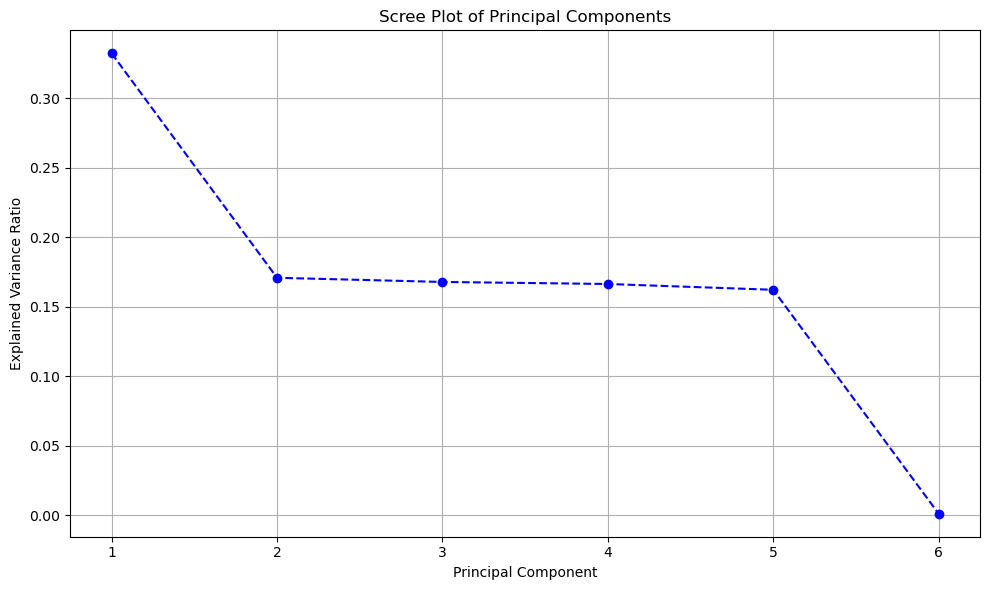

In [11]:
# Plotting the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

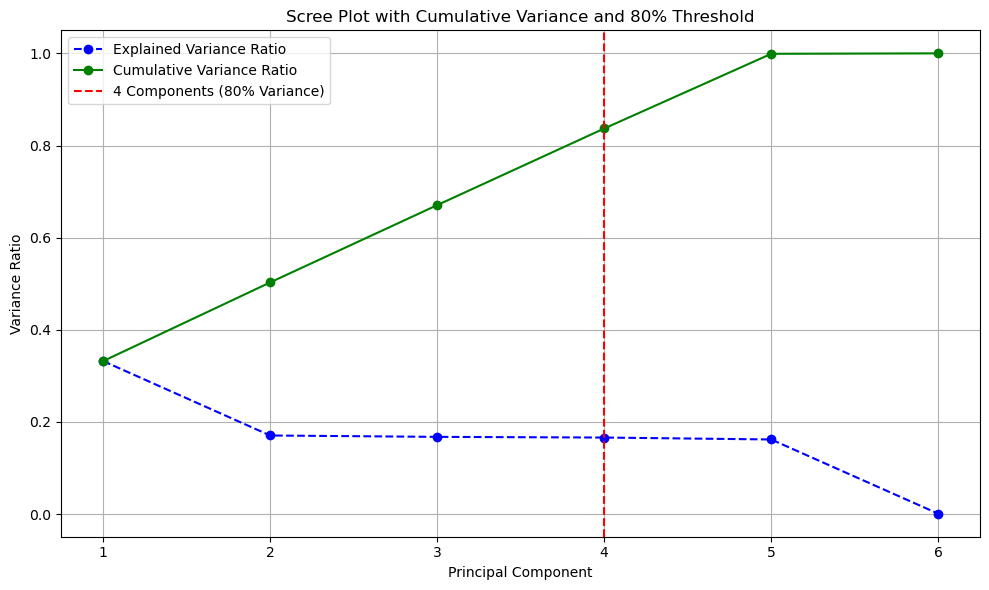

In [13]:
# Calculating the cumulative variance explained by the principal components
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Identifying the number of components needed to capture at least 80% of the variance
components_threshold = (cumulative_variance_ratio >= 0.80).argmax() + 1

# Creating a scree plot with a line marking the threshold for capturing most variance (80%)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='g', label='Cumulative Variance Ratio')
plt.axvline(x=components_threshold, color='r', linestyle='--', label=f'{components_threshold} Components (80% Variance)')

# Adding labels and legend
plt.title('Scree Plot with Cumulative Variance and 80% Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Calculating the cumulative variance explained by the principal components
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Displaying the cumulative variance ratio
total_variance_captured = cumulative_variance_ratio[-1] * 100
print(f"Total variance captured by all components: {total_variance_captured:.2f}%")

# Finding the number of components that capture at least 80% of the variance
components_threshold = (cumulative_variance_ratio >= 0.80).argmax() + 1
print(f"Number of components needed to capture 80% of the variance: {components_threshold}")


Total variance captured by all components: 100.00%
Number of components needed to capture 80% of the variance: 4


In [22]:
# Creating the component loadings matrix for the adjusted PCA (top 8 components)
optimal_pca_components_matrix = pd.DataFrame(
    optimal_pca.components_,
    columns=continuous_vars,
    index=[f'PC{i+1}' for i in range(4)]
)

# Displaying the component loadings matrix for the adjusted PCA
print(optimal_pca_components_matrix)

          Age    Income  Outage_sec_perweek    Tenure  MonthlyCharge  \
PC1  0.001961  0.003928            0.005843  0.705857       0.040767   
PC2 -0.103503  0.371380           -0.657461  0.039267      -0.646192   
PC3  0.899687 -0.079329           -0.380721  0.003119       0.197816   
PC4  0.012702  0.895354            0.071038 -0.030137       0.438434   

     Bandwidth_GB_Year  
PC1           0.707142  
PC2           0.001714  
PC3          -0.013426  
PC4          -0.000788  


In [24]:
# Applying PCA with the optimal number of components (8 components, capturing over 80% of the variance)
optimal_pca = PCA(n_components=4)
optimal_pca_result = optimal_pca.fit_transform(data_standardized)

# Calculating the explained variance for the reduced PCA
optimal_explained_variance = optimal_pca.explained_variance_ratio_
optimal_cumulative_variance = optimal_explained_variance.cumsum()

# Creating a DataFrame to summarize the results of the adjusted PCA
adjusted_pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(4)],
    'Explained Variance Ratio (%)': optimal_explained_variance * 100,
    'Cumulative Variance Ratio (%)': optimal_cumulative_variance * 100
})

# Displaying the adjusted PCA summary
print(adjusted_pca_summary)

  Principal Component  Explained Variance Ratio (%)  \
0                 PC1                     33.219839   
1                 PC2                     17.072444   
2                 PC3                     16.773388   
3                 PC4                     16.626624   

   Cumulative Variance Ratio (%)  
0                      33.219839  
1                      50.292283  
2                      67.065672  
3                      83.692296  


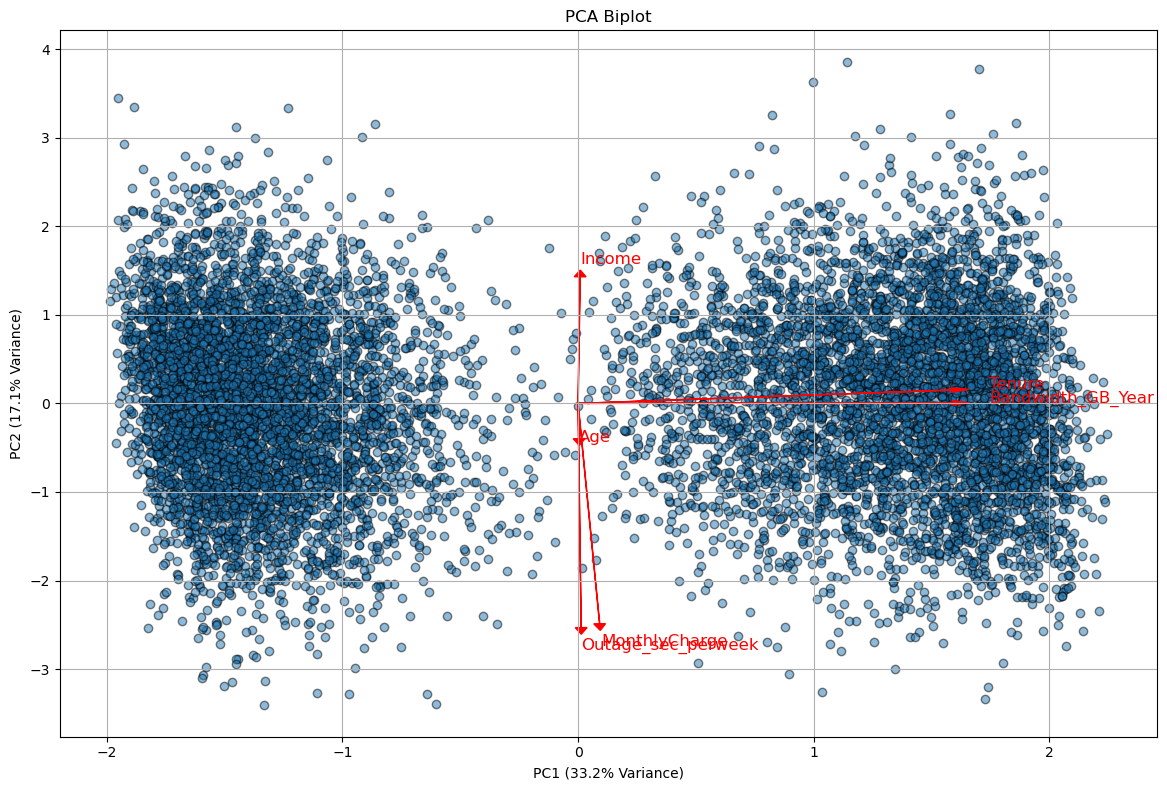

In [25]:
import numpy as np

def biplot(scores, loadings, explained_variance_ratio, labels, top_n_components=2):
    plt.figure(figsize=(12, 8))

    # Plotting the scores for the first two principal components
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5, edgecolors='k')

    # Plotting the loadings (arrows for variable contributions)
    for i, var in enumerate(labels):
        plt.arrow(0, 0, loadings[0, i] * max(scores[:, 0]), loadings[1, i] * max(scores[:, 1]),
                  color='r', head_width=0.05)
        plt.text(loadings[0, i] * max(scores[:, 0]) * 1.1, loadings[1, i] * max(scores[:, 1]) * 1.1, var, 
                 color='r', fontsize=12)

    plt.xlabel(f'PC1 ({explained_variance_ratio[0] * 100:.1f}% Variance)')
    plt.ylabel(f'PC2 ({explained_variance_ratio[1] * 100:.1f}% Variance)')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generating a biplot using the scores and loadings from the adjusted PCA (first two components)
biplot(
    optimal_pca_result, 
    optimal_pca.components_, 
    optimal_explained_variance, 
    continuous_vars, 
    top_n_components=2
)

In [ ]:
# Save the modified dataset
output_file_path = 'churn_clean_updated.csv'
df.to_csv(output_file_path, index=False)